# Problem Set 1


Importing libraries

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.datasets import load_boston
from sklearn import tree
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Part 1: Creating helper functions

Q1. Create a helper function to calculate Gini impurity called "calcGini". This function should take in two values which represent a count of each class (we can assume only two classes for this problem set) and output the Gini impurity.

In [2]:
#Calculating Gini Impurity
def calcGini(val1, val2):
    if ((val1 == 0) and (val2 == 0)):
        return 0
    val1_prob=val1/(val1+val2)
    val2_prob=val2/(val1+val2)
    gini_impurity=1-((val1_prob**2)+(val2_prob**2))
    return(gini_impurity)  

Q2. Create a helper function to calculate Gini impurity called "calcEntropy". This function should take in two values which represent a count of each class (we can assume only two classes for this problem set) and output the entropy. (Note: be sure the function appropriately accounts for zero values)

In [3]:
#Calculating Entropy
def calcEntropy(val1, val2):
    if ((val1 == 0) and (val2 == 0)):
        return 0
    val1_prob=val1/(val1+val2)
    val2_prob=val2/(val1+val2)
    if ((val1_prob==0) or (val2_prob==0.0)):
        return 0
    else:
        entropy=-(val1_prob)*math.log2(val1_prob)-(val2_prob)*math.log2(val2_prob)
        return(entropy)   

Q3. Create a helper function to calculate weighted sums called "weightedSum". This function should take in two lists - one of values and one of weights/counts - and should output the weighted sum of the values as weighted by weights/counts.

In [4]:
#Caluclating weighted sums
def weightedSum(values, weights):
    weighted_sum=0
    for i in range(len(values)):
        weighted_sum=weighted_sum+values[i]*weights[i]
    return(weighted_sum)

Q4. Verify that your functions are working as expected. Use the same dataset/calculations from lecture and calculate the Gini impurity and entropy for each column. The data can be found in the toyData.csv file.

In [5]:
#Loading the toy data
toy_data_df=pd.read_csv("toyData.csv")
toy_data_df

,Variable A,Variable B,Variable C,Output
0,Yes,On,High,Red
1,No,Off,Low,Blue
2,Yes,On,High,Red
3,Yes,Off,High,Red
4,No,On,High,Blue
5,Yes,On,Low,Blue
6,No,Off,High,Blue
7,No,On,High,Blue
8,Yes,On,Low,Blue
9,Yes,Off,High,Red


In [6]:
#Checking the distribution of values of each variable
toy_data_df.describe()

,Variable A,Variable B,Variable C,Output
count,10,10,10,10
unique,2,2,2,2
top,Yes,On,High,Blue
freq,6,6,7,6


###### Calculating the Gini Impurity, Entropy and Information Gain for all the 3 variables in the toy data.


In [7]:
#Getting the input columns(features) from toy data
x_cols  = toy_data_df.columns[:3]

# Calculating the Number of Red and Blue outputs in the toy data 
red_output= len(toy_data_df[toy_data_df['Output'] =='Red'])
blues_output = len(toy_data_df[toy_data_df['Output'] =='Blue'])

#Calculating the entropy of the toy_data
entropy_tree = calcEntropy(red_output,blues_output)

#Iterating through all the variables
for col in x_cols:
    current = toy_data_df[col]
    gini_vals = []
    entropy_vals = []
    weights_vals = []
    uniqueVals = current.unique()
    
    #Iterating over each unique value of the variables
    for val in uniqueVals:
        current_df = toy_data_df[toy_data_df[col] == val]
        reds = len(current_df[current_df['Output'] =='Red'])
        blues = len(current_df[current_df['Output'] =='Blue'])
        gini_vals.append(calcGini(reds, blues))
        entropy_vals.append(calcEntropy(reds, blues))
        weights_vals.append(len(current_df)/len(toy_data_df))
    
    #Calculating the Gini Impurity and Entropy for each variable
    gini_val  = weightedSum(gini_vals,weights_vals)
    entropy_val  = weightedSum(entropy_vals,weights_vals)
    
    print("\nThe Gini Impurity for variable ", col, "is", round(gini_val,2))
    print("The Entropy for variable ", col, "is", round(entropy_val,2))
    print("Information Gain for variable", col, "is", round(entropy_tree - entropy_val,2))


The Gini Impurity for variable  Variable A is 0.27
The Entropy for variable  Variable A is 0.55
Information Gain for variable Variable A is 0.42

The Gini Impurity for variable  Variable B is 0.47
The Entropy for variable  Variable B is 0.95
Information Gain for variable Variable B is 0.02

The Gini Impurity for variable  Variable C is 0.34
The Entropy for variable  Variable C is 0.69
Information Gain for variable Variable C is 0.28


## Part 2: Building trees

Q5. Import the Boston using dataset using sklearn.datasets. Create a new column called "highPriced" that is a boolean indicator of whether the target value in the dataset (i.e.MEDV or median home value) is greater than $35K. The variable "highPriced" will be our response/output variable going forward. What are some interesting features of this variable?

###### Response: 

*We get following observation about our output variable ***highPriced*** :*

For the output variable highPriced, the total number of observations for highPriced (class:1) is **48** and the total number of observations for not highPriced (class:0) is **458**. From the unique values count distribution of our output variable highPriced, we can see that the total number of observations for not highPriced i.e **"0"** class is very much greater than the total number of observations for highPriced i.e **"1"** class. 

Thus, we can say that our output variable "highPriced" is class imbalanced in nature due to large difference in its binary output occurences.

In [8]:
#Loading the boston data
boston_data = load_boston()
boston_df=pd.DataFrame(boston_data.data)

#Getting the features and target from the bostone data
boston_df.columns = boston_data.feature_names
boston_target=pd.DataFrame(boston_data.target)
boston_target.columns=["MEDV"]

#Creating a new variable highPriced
boston_df['highPriced'] = np.where(boston_target['MEDV'] > 35, 1, 0)

#Getting the Count of highPriced Yes and No
print("Distribution of highPriced unique values:")
boston_df.highPriced.value_counts()

Distribution of highPriced unique values:


0    458
1     48
Name: highPriced, dtype: int64

Q6.Using your helper functions and with highPriced as your output, find what the best split is along the AGE variable using each of Gini impurity and entropy as the splitting criterion. (Hint: it may help to build this process as a function because you will be doing it many times throughout this problem set.) Assume the \left" side of each split contains all values less than and the "right" side contains all values equal to or greater than. What is the optimal split point when using Gini impurity. What about when using entropy? What if we calculate the same using the CRIM variable? Comment on any similarities and
differences.

##### Response: 

*We get the following observations about the opimal split for both the variables "Age" and "CRIM":*

1) For the input variable **"AGE"**, we can see that the optimal split value is **37.25** and that it is same using the both criteria  - Gini Impurity and Entropy.

2) For the input variable **"CRIM"**, we can see that the optimal split value is **0.022** using the Gini Impurity criteria and **9.281** using the entropy as the criteria. Thus, there is a difference in the optimal split value for the "CRIM" variable using Gini Impurity and Entropy as each criteria gives its minimum impurity value for different values of the "CRIM" variable.

In [9]:
#Function to calculate the Gini Impurity and Entropy of each column and also get the best split col and its threshold
def get_best_split_value(X, y):
    
    x_cols  = X.columns
    dataset = pd.concat([X,y], axis=1)
    
    #Creating empty dictionaries to store the threshold value and Entropy values of the columns
    col_entropy_split_val_dict = {}
    col_entropy_dict = {}
    
    #Creating empty dictionaries to store the threshold value and Gini Impurity values of the columns
    col_gini_imp_split_val_dict = {}
    col_gini_imp_dict = {}
    
    #Calculating the mean value for each adjacent pair of values for a variable
    for col in x_cols:
        mean_vals =[]
        sorted_vals = sorted(dataset[col])
        for i in range(0,len(sorted_vals)-1):
            mean_vals.append((sorted_vals[i]+sorted_vals[i+1])/2)
            unique_vals = list(set(mean_vals))            

        gini_imp_split_val = 0
        entropy_split_val = 0
        min_gini_imp = math.inf
        min_entropy = math.inf
        
        #Iterating through each unique mean value for each input columns 
        #and calculating the entropy and gini impurity for each class of the output variable
        for val in unique_vals:
            gini_imp_vals  = []
            entropy_vals = []
            weight_vals =[]
            
            current_less_df = dataset[dataset[col]  < val]
            current_greater_df = dataset[dataset[col]  >= val]
            
            yes_vals = len(current_less_df[current_less_df['highPriced'] ==1])
            no_vals = len(current_less_df[current_less_df['highPriced'] ==0])
            gini_imp_vals.append(calcGini(yes_vals, no_vals))
            entropy_vals.append(calcEntropy(yes_vals, no_vals))
            weight_vals.append(len(current_less_df)/len(dataset)) 
            
            yes_vals = len(current_greater_df[current_greater_df['highPriced'] ==1])
            no_vals = len(current_greater_df[current_greater_df['highPriced'] ==0])
            gini_imp_vals.append(calcGini(yes_vals, no_vals))
            entropy_vals.append(calcEntropy(yes_vals, no_vals))
            weight_vals.append(len(current_greater_df)/len(dataset)) 
            
            #Calculating weighted Gini Impurity
            weighted_gini_imp_val = weightedSum(gini_imp_vals,weight_vals)
            
            #Storing the threshold value of the column having the minimum Gini Impurity
            if weighted_gini_imp_val < min_gini_imp:
                min_gini_imp = weighted_gini_imp_val
                gini_imp_split_val = val
            
            #Calculating the weighted Entropy 
            weighted_entropy_val = weightedSum(entropy_vals,weight_vals)
            
            #Storing the threshold value of the column having the minimum Entropy
            if weighted_entropy_val < min_entropy:
                min_entropy = weighted_entropy_val
                entropy_split_val = val
         
        #Storing the Minimum Entropy and the best split value for each column
        col_entropy_dict[col] = min_entropy
        col_entropy_split_val_dict[col] = entropy_split_val
        
        #Storing the Minimum Gini Impurit and the best split value for each column
        col_gini_imp_dict[col] = min_gini_imp
        col_gini_imp_split_val_dict[col] = gini_imp_split_val
        
        
        if len(x_cols) == 1:
            print("\nThe best split value using the Gini Impurity criterion for the", col,"variable is" , round(gini_imp_split_val,3))
            print("The best split value using the Entropy criterion for the", col,"variable is" , round(entropy_split_val,3))
        
    #Getting the minimum Entropy among all the columns          
    minimum_entropy = min(col_entropy_dict.values())
    
    #Choosing the column having the least Entropy
    cols_with_min_entropy = [key for key in col_entropy_dict if col_entropy_dict[key] == minimum_entropy] 
    
    #Getting the minimum Gini Impurity among all the columns          
    minimum_gini_imp = min(col_gini_imp_dict.values())
    
    #Choosing the column having the least Gini Impurity
    cols_with_min_gini_imp = [key for key in col_gini_imp_dict if col_gini_imp_dict[key] == minimum_gini_imp]       
    
    #Returning a dictionary containing the best split value(threshold) and its column name 
    #using the Gini Impurity and Entropy as the criteria
    best_split_entropy_cols = {}
    best_split_gini_imp_cols = {}
    
    for best_col in cols_with_min_entropy:
        best_split_entropy_cols[best_col] = col_entropy_split_val_dict[best_col]
    for best_col in cols_with_min_gini_imp:
        best_split_gini_imp_cols[best_col] = col_gini_imp_split_val_dict[best_col]
    return [best_split_entropy_cols , best_split_gini_imp_cols] 

###### Getting the Best split value using Gini Impurity and Entropy criteria for different Boston columns

In [10]:
X_age = pd.DataFrame(boston_df['AGE'])
y_age = pd.DataFrame(boston_df['highPriced'])

#Getting the Gini Impurity and Entropy for column age
res = get_best_split_value(X_age, y_age)


The best split value using the Gini Impurity criterion for the AGE variable is 37.25
The best split value using the Entropy criterion for the AGE variable is 37.25


In [11]:
X_crim= pd.DataFrame(boston_df['CRIM'])
y_crim= pd.DataFrame(boston_df['highPriced'])

#Getting the Gini Impurity and Entropy for column CRIM
res = get_best_split_value(X_crim, y_crim)


The best split value using the Gini Impurity criterion for the CRIM variable is 0.022
The best split value using the Entropy criterion for the CRIM variable is 9.281


Q7. Import sklearn's DecisionTreeClassiffer and find what the optimal split is along the AGE variable using entropy. Show that the optimal value as calculated by sklearn's classiffer is 37.25. If this is different than what you calculated, explain why and adjust your outputs so it gives you the same value. (Hint: you may have implemented a splitting method that looked at axis-aligned splits at every data point whereas sklearn looks at axis-aligned splits between every pair of data points.)

###### Response: 

*We get the following observation about optimal split along **AGE** variable:*

1.) The optimal split value for variable **"Age"** is **37.25** using the sklearn's DecisionTreeclassifier.

2.) The calculated optimal split value from our method created to get the best split and that from the sklearn's DecisionTreeclassifier is same**(37.25)**

3.) It is same, as the approach used to calculate the optimal split value in our written function is similar to the inbuilt DecisionTreeClassifier, where we look at the unique mean values of the adjacent pair of data points and then calculate the best split value considering these unique values.

In [12]:
#Getting X and y
x_age=np.array(boston_df.AGE)
x_age=x_age.reshape(-1,1)
y=np.array(boston_df.highPriced)

#Using inbuilt decision tree
clf = tree.DecisionTreeClassifier(criterion="entropy")
model = clf.fit(x_age,y)
print("The best split value for the variable 'AGE' using sklearn's DecisionTreeClassiffer is",model.tree_.threshold[0])

The best split value for the variable 'AGE' using sklearn's DecisionTreeClassiffer is 37.25


Q8. Using the RM, LSTAT, and RAD variables, build a a decision tree with 2 levels (3 split points, 4 leaf nodes) based on entropy. Show the splits as a pandas DataFrame with the following columns: level (indicates which level of the tree the split occurs. You should have a 1 once and 2 twice), col (indicates the column across which the split occurs), and threshold (indicates the threshold used in the split).

In [13]:
#Storing input and output variables
X_data = boston_df.filter(['RM','LSTAT','RAD'], axis=1)
y_data= pd.DataFrame(boston_df['highPriced'])

In [14]:
#Creating two global variables to store the decision tree and rules of the decision tree
dec_tree_df = pd.DataFrame(columns=['level', 'col', 'threshold'])
dec_tree_rules_df = pd.DataFrame()

###### Defining multiple functions for creating the decision tree

In [15]:
#Helper function to get the left and right sub stree and number of Yes and No in both the sub trees
def get_split_data(dataframe, colname, threshold_value, get_Rules):
    
    #Creating left and right sub strees
    left_tree = dataframe[dataframe[colname] < threshold_value]
    right_tree = dataframe[dataframe[colname] >= threshold_value]
    
    decision_tree_rules_df = pd.DataFrame()
    
    #If leaf nodes, getting the number of Yes and No of the both the sub trees
    if get_Rules == True:
        decision_tree_rules_df = pd.concat([decision_tree_rules_df,pd.DataFrame(left_tree.highPriced.value_counts()).transpose()], axis =0)
        decision_tree_rules_df = pd.concat([decision_tree_rules_df , pd.DataFrame(right_tree.highPriced.value_counts()).transpose()], axis =0)
    
    return left_tree,right_tree, decision_tree_rules_df 

In [16]:
#Recursive function to get the best split column and its threshold for each level
def create_decision_tree(left, right, X_cols , y_col, depth,level):
    
    global dec_tree_rules_df
    global dec_tree_df
    
    #Building the left tree
    if (left.empty == False):  
        X_left = left.filter(X_cols, axis=1)
        y_left= left.filter(y_col,axis =1)
        #Getting the best split col and its threshold value based on entropy criteria
        res_left = get_best_split_value(X_left, y_left)[0] 
    
        #Storing the level and the best column and its value for splitting
        row_df = pd.Series([level, list(res_left.keys())[0], list(res_left.values())[0]], index=dec_tree_df.columns)
        dec_tree_df = dec_tree_df.append(row_df, ignore_index=True)
        
        #Getting the left and right sub stree depending on the best split criteria
        left_left_tree, left_right_tree, rules_left_df = get_split_data(left , list(res_left.keys())[0] , list(res_left.values())[0], (depth-1) == 0)    
        dec_tree_rules_df = pd.concat([dec_tree_rules_df, rules_left_df], axis = 0)
        
        #Base condition for the function
        if(depth-1) != 0:
            create_decision_tree(left_left_tree, left_right_tree, X_cols , y_col, depth-1, level+1)
            
    
    #Building the right tree
    if (right.empty == False):
        X_right = right.filter(X_cols, axis=1)
        y_right= right.filter(y_col,axis =1)
        #Getting the best split col and its threshold value based on entropy criteria
        res_right = get_best_split_value(X_right, y_right)[0]
        
        #Storing the level and the best column and its value for splitting
        row_df = pd.Series([level, list(res_right.keys())[0], list(res_right.values())[0]], index=dec_tree_df.columns)
        dec_tree_df = dec_tree_df.append(row_df, ignore_index=True)
        
        #Getting the left and right sub stree depending on the best split criteria
        right_left_tree, right_right_tree, rules_right_df = get_split_data(right , list(res_right.keys())[0] , list(res_right.values())[0], (depth-1) == 0)    
        dec_tree_rules_df = pd.concat([dec_tree_rules_df, rules_right_df], axis = 0)
        
        #Base condition for the function
        if (depth-1) != 0:
            create_decision_tree(right_left_tree, right_right_tree, X_cols , y_col, depth-1,level+1)

In [17]:
#Main function for creating the decision tree
def decision_tree(X,y, depth): 
    
    global dec_tree_rules_df
    global dec_tree_df
    flush_data()   
    #Initialising required variables
    dataset = pd.concat([X,y], axis=1)
    x_cols = X.columns
    y_col = y
    level = 1
    decision_tree_rules_df = pd.DataFrame()
    no_leaf_nodes = []
    
    #Geting all the Leaf Node Numbers
    for leaf_node in range(2**(depth)):
        no_leaf_nodes.append(leaf_node+1)
     
    #Calling the recursive helper function to create the decision tree
    create_decision_tree(dataset,pd.DataFrame(),x_cols,y_col, depth, level)
    
    #Completing the decisiosn tree rules dataframe
    dec_tree_rules_df["Leaf_Node"] = no_leaf_nodes
    #Storing the decision for each leaf node based on the count majority of the output for the leaf
    dec_tree_rules_df["Decision_Node"] = np.where(dec_tree_rules_df[1] > dec_tree_rules_df[0], 1, 0)
    

In [18]:
#Function to flushing the two dataframes used
def flush_data():
    global dec_tree_rules_df
    global dec_tree_df
    dec_tree_df = pd.DataFrame(columns=['level', 'col', 'threshold'])
    dec_tree_rules_df = pd.DataFrame()

###### Calling the decision tree function

In [19]:
depth = 2
decision_tree(X_data,y_data,depth)

In [20]:
dec_tree_df

,level,col,threshold
0,1,RM,6.941
1,2,LSTAT,9.535
2,2,RM,7.437


*The above table shows us the optimal split column and its value for the 2 levels of the decision tree.*

In [21]:
dec_tree_rules_df

,0,1,Leaf_Node,Decision_Node
highPriced,129,6.0,1,0
highPriced,295,NaN,2,0
highPriced,33,13.0,3,0
highPriced,1,29.0,4,1


*The above table shows us the Decision Node for each Leaf Node of the decision Tree*

Q9. Visualize your splits on an X-Y plane. Set the x-axis to be RM and the y-axis to be LSTAT. Plot the target variable and use straight lines to indicate the axis-aligned splits for your 2-level decision tree. Make sure your visualization is understandable and comment on what you see.

###### Response: 

*We can get the following observations from the below graph:*

1.) The below graph shows the decision boundaries for each level of the decision tree. 

2.) The **yellow** line depicts the root split which splits the data as greater than and less than the threshold **RM** value of **6.943**.

3.) The **blue** and the **pink** lines shows the level 2 split where the data is split for variable LSTAT at value **9.54** and **RM** at value **9.45**

4.) We can see that most observations having a value of **LSTAT** greater than its threshold value*(level 2 split)* and a value of **RM** greater than its threshold value*(level 2 split)* are **high priced** *(Red points)*. The most of the other observations lying within other boundaries are **not high priced** *(Green points)*. 

*This graph can be informative, while deciding the rules for the decision tree.*

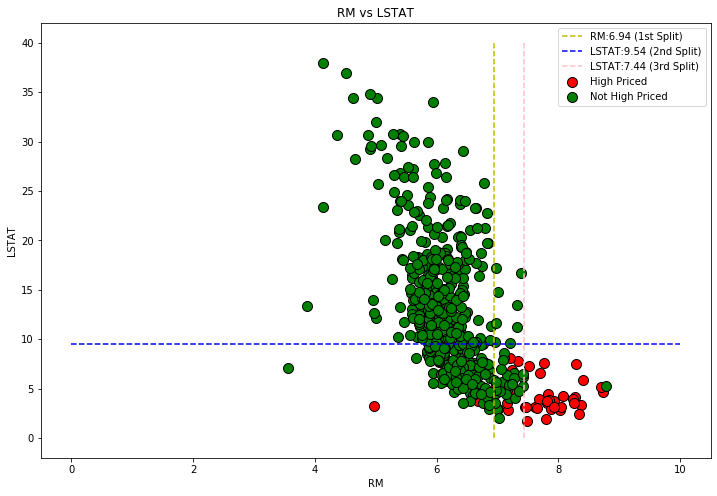

In [22]:
#Visisualization
high_Priced_df = boston_df[boston_df.highPriced == 1]
not_highPriced_df = boston_df[boston_df.highPriced == 0]
fig=plt.gcf()
fig.set_size_inches(12,8)

#Plotting highPriced target variable 
plt.scatter(high_Priced_df['RM'], high_Priced_df['LSTAT'], c='r', edgecolor='k',s=100, label ="High Priced")
plt.scatter(not_highPriced_df['RM'], not_highPriced_df['LSTAT'], c='g', edgecolor='k', s=100,label ="Not High Priced")
plt.xlabel('RM')
plt.ylabel('LSTAT')
plt.title("RM vs LSTAT")

#Plotting the decision boundary lines
split_val1 = round(dec_tree_df.iloc[0][2],2)
line1_label = "RM:" + str(split_val1) + " (1st Split)"
split_val2  = round(dec_tree_df.iloc[1][2],2)
line2_label = "LSTAT:" + str(split_val2) + " (2nd Split)"
split_val3  =round(dec_tree_df.iloc[2][2],2)
line3_label = "LSTAT:" + str(split_val3) + " (3rd Split)"             
plt.plot([split_val1,split_val1],[0,40],c ='y', linestyle='dashed', label = line1_label)
plt.plot([0,10],[split_val2,split_val2],c ='b', linestyle='dashed', label = line2_label)
plt.plot([split_val3,split_val3],[0,40],c ='pink', linestyle='dashed', label = line3_label)

#Displaying the plot
plt.legend()
plt.show()

## Part 3: Making predictions

Q10. Create a training/test split for your data. Assume the data is already randomized and select every 5th observation from the original dataset to be in your test data (i.e. when working in Pandas, your test dataframe should contain index 0, 5, 10, 15, ...) and all other observations in your training data. How many observations are in your training and test datasets, respectively? How does the target variable look across the two datasets?

###### Response:

*We get the following observations from our training and testing data:*

1.) The training dataset has **404** observations.<br/>

2.) The testing dataset has **102** observations.<br/>

3.) In our training dataset, the target variable (highPriced) has **363** observations having **"0"** class and **41** observations having **"1"** class.<br/>

4.) In our testing dataset, the target variable (highPriced) has **95** observations having **"0"** class and **7** observations having **"1"** class.<br/>

5.) Both the training and testing datasets follows the same nature as the entire dataframe i.e. being class imblanced as the number of observations having target class as **"0"** is much greater than number of observations having target class as **"1"**.<br/>

6.) We can see that only **~10%** of our output variable is high priced and all the other observations are not high priced for the training as well as the testing data.

In [23]:
#Creating the training and testing data
training_data=boston_df[boston_df.index % 5 != 0]
testing_data=boston_df[boston_df.index % 5 == 0]

print("Number of observations in the training data is :", len(training_data))
print("\nNumber of observations in the testing data is :", len(testing_data))
print("\nTarget variable(highPriced) values Distribution for Training Data:\n")
print(training_data.highPriced.value_counts())
print("\nTarget variable(highPriced) values Distribution for Testing Data:\n")
print(testing_data.highPriced.value_counts())

Number of observations in the training data is : 404

Number of observations in the testing data is : 102

Target variable(highPriced) values Distribution for Training Data:

0    363
1     41
Name: highPriced, dtype: int64

Target variable(highPriced) values Distribution for Testing Data:

0    95
1     7
Name: highPriced, dtype: int64


Q11: Create a baseline set of predictions. In classification tasks, when reaching a leaf node that is not pure, predictions are often made by randomly selecting from training observations in the corresponding node. Suppose you had a tree with zero splits across your training dataset (i.e. the entirety of your training dataset) and you made predictions for your test dataset. In other words, "predict" values for your test dataset by randomly sampling (with replacement) from the target variable across the entirety of your training dataset. How do your predictions fare in terms of accuracy and other metrics (Note: when comparing subsequent classifiers, use not only accuracy, but other metrics as well. Also, contextualize differences you may find.)

###### Response: 

By looking at the below baseline predictions we can see that even though our accuracy is **78.43%** which is quite high, our precision**(0.06)** and recall**(0.14)** and F1**(0.08)** scores are very low. This means that there are a high number of false positives and false negatives predicted, even though the overall accuracy is good.

In [24]:
random.seed(2)
y_pred=random.choices(list(training_data['highPriced']), k=len(testing_data))

print("Baseline predictions:\n")
print("Accuracy:", round(accuracy_score(testing_data['highPriced'], y_pred)*100,2),"%")
print("Precision:", round(precision_score(testing_data['highPriced'], y_pred),2))
print("Recall:", round(recall_score(testing_data['highPriced'], y_pred),2))
print("F1 score:", round(f1_score(testing_data['highPriced'], y_pred),2))

Baseline predictions:

Accuracy: 78.43 %
Precision: 0.06
Recall: 0.14
F1 score: 0.08


Q12: Now, use a 2-level decision tree to make predictions. Re-train a 2-level decision tree (i.e. a tree with 4 leaf nodes) using the training dataset with only the RM and LSTAT variables as inputs. How does it compare to the decision tree you built using the entirety of the data? Again, at each leaf node, randomly sample the output values from the training observations to make predictions for the test set. How do the predictions from this classifier compare to the baseline you created in question 11?

###### Response: 

*We can see the following obervations about the new Decision tree:*

1.) The new decision tree of the training data is similar in nature as compared to the original decision tree.<br/>

2.) The root split occurs using the **RM** variable having a optimal value(threshold) of **7.127**.<br/>

3.) The left tree consists of all values less than the root node value and the left split occurs for the **LSTAT** variable having a optimal value of **5.115**. <br/>

4.) The right tree consists of all values greater than or equal to the root node value and the right split occurs for the **RM** variable having a optimal value of **7.437**.<br/>

5.) The decision nodes for each Leaf Node arw also same as that of the original decision tree.

In [25]:
#Getting input and output variables for training and testing data
X_train = training_data[['RM','LSTAT']]
y_train = training_data[['highPriced']]
X_test = testing_data[['RM','LSTAT']]
y_test = testing_data['highPriced']

###### Modeling(training)  the training data

In [26]:
#Getting the decision tree for training data
decision_tree(X_train,y_train,2)

In [27]:
dec_tree_df

,level,col,threshold
0,1,RM,7.127
1,2,LSTAT,5.115
2,2,RM,7.437


In [28]:
dec_tree_rules_df

,0,1,Leaf_Node,Decision_Node
highPriced,21,6,1,0
highPriced,328,3,2,0
highPriced,13,7,3,0
highPriced,1,25,4,1


###### Function for predicting the testing data

In [29]:
#Function to iterate through every row of the test data and outputs the prediction as per the decision tree rules.
def predict_dec_tree(test_data,decision_tree_df, rules_df):
    
    #List to store the predictions
    predictions = []
    test_data_df = test_data.reset_index()
    
    #Iterating over each row of testing data
    for i in range(len(test_data_df)) : 
        if test_data_df.loc[i, decision_tree_df.iloc[0]['col']] < decision_tree_df.iloc[0]['threshold']:
            if test_data_df.loc[i, decision_tree_df.iloc[1]['col']] < decision_tree_df.iloc[1]['threshold']:
                predictions.append(rules_df.iloc[0]['Decision_Node'])
            else:
                predictions.append(rules_df.iloc[1]['Decision_Node'])         
        else:
            if test_data_df.loc[i, decision_tree_df.iloc[2]['col']] < decision_tree_df.iloc[2]['threshold']:
                predictions.append(rules_df.iloc[2]['Decision_Node'])
            else:
                predictions.append(rules_df.iloc[3]['Decision_Node'])
    
    return predictions

###### Predicting the testing data

###### Response:

*We can see the following obervations about the predictions of this classifier:*

1.) This classifier has a accuracy of **97.06%** which is much better than our baseline prediction.<br/>

2.) The model has a perfect precision score having score as **1** which means that there are no false positives (i.e. no high priced observations are classified as high priced).<br/>

3.) The model has an average recall score of **0.57** meaning that some high priced observations are classified as not high priced.<br/>

4.) The model has decent F1 score of **0.73** which is much higher than that of our baseline model.<br/>

5.) Overall, this classifier predictions are much better in terms of accuracy as well as other metrics as compared to the baseline predictions.<br/>

In [30]:
#Predicting the testing data
y_pred= predict_dec_tree(X_test,dec_tree_df, dec_tree_rules_df)
y_hat = np.where(y_pred == y_test , 1,0)

In [31]:
print("Predictions:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
print("Precision:", round(precision_score(y_test, y_pred),2))
print("Recall:", round(recall_score(y_test, y_pred),2))
print("F1 score:", round(f1_score(y_test, y_pred),2))

Predictions:

Accuracy: 97.06 %
Precision: 1.0
Recall: 0.57
F1 score: 0.73


## Part 4: Comparing to out-of-the-box classifiers

Q13: Use sklearn's DecisionTreeClassifier to recreate the decision tree that is trained on the training data. There may be slight differences in the predictions but show that 1)the splits are at the same locations as the tree you built and 2) the probabilities for the leaf nodes are also the same. How do the predictions from this classifier compare to both your decision tree as well as the baseline you created in question 11?

###### Response:

*We can see the following observations from the sklearn's DecisionTreeClassifier:* 


1.) The new decision tree has splits at the same location as that of the decision tree we built. The root split occurs using the **RM** variable having a optimal value(threshold) of **7.127**.The left tree consists of all values less than the root node value and the left split occurs for the **LSTAT** variable having a optimal value of **5.115**.The right tree consists of all values greater than or equal to the root node value and the right split occurs for the **RM** variable having a optimal value of **7.437**.<br/>

2.) The new decision tree has the same probabilities for the leaf nodes as that of the decision tree we built. Leaf Node 1 *(left most)* has the **26** highPriced observations and **1** not highPriced and has output class as **'0'**. Leaf Node 2 has the **328** highPriced observations and **3** not highPriced and has output class as **'0'**. Leaf Node 3 has the **13** highPriced observations and **7** not highPriced and has output class as **'0'**. Leaf Node 4 has the **1** highPriced observations and **25** not highPriced and has output class as **'1'**.<br/>

3.)sklearn's DecisionTreeClassifier has a accuracy of **97.06%** which is much better than our baseline prediction.The model has a perfect precision score having score as **1** which means that there are no false positives (i.e. no high priced observations are classified as high priced).The model has an average recall score of **0.57** meaning that some high priced observations are classified as not high priced. The model has decent F1 score of **0.73**.<br/>

4.) The new decision has the same predictions as that of the decision tree we built. All the metrics are exactly same as that of our decision tree. Also, the classifier predictions are much better in terms of accuracy as well as other metrics as compared to the baseline predictions.<br/>

[Text(223.2, 362.4, 'RM <= 7.127\nentropy = 0.474\nsamples = 404\nvalue = [363, 41]\nclass = 0'),
 Text(111.6, 217.44, 'LSTAT <= 5.115\nentropy = 0.169\nsamples = 358\nvalue = [349, 9]\nclass = 0'),
 Text(55.8, 72.47999999999996, 'entropy = 0.764\nsamples = 27\nvalue = [21, 6]\nclass = 0'),
 Text(167.39999999999998, 72.47999999999996, 'entropy = 0.075\nsamples = 331\nvalue = [328, 3]\nclass = 0'),
 Text(334.79999999999995, 217.44, 'RM <= 7.437\nentropy = 0.887\nsamples = 46\nvalue = [14, 32]\nclass = 1'),
 Text(279.0, 72.47999999999996, 'entropy = 0.934\nsamples = 20\nvalue = [13, 7]\nclass = 0'),
 Text(390.59999999999997, 72.47999999999996, 'entropy = 0.235\nsamples = 26\nvalue = [1, 25]\nclass = 1')]

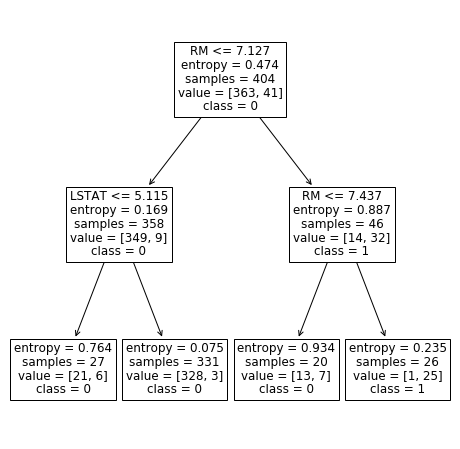

In [32]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
dec_tree_mod = clf.fit(X_train,y_train)
plt.figure(figsize=(8,8))
tree.plot_tree(dec_tree_mod, feature_names=X_train.columns, class_names=["0","1"])

In [33]:
y_pred_dec_tree = dec_tree_mod.predict(X_test)
print("Predictions:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dec_tree)*100,2),"%")
print("Precision:", round(precision_score(y_test, y_pred_dec_tree),2))
print("Recall:", round(recall_score(y_test, y_pred_dec_tree),2))
print("F1 score:", round(f1_score(y_test, y_pred_dec_tree),2))

Predictions:

Accuracy: 97.06 %
Precision: 1.0
Recall: 0.57
F1 score: 0.73


Q14: Use sklearn's BaggingClassifier to create a bagging classifier whose base is a DecisionTreeClassifier with 2 levels and entropy as the split criterion. Train it on your training dataset and make predictions for your test dataset. How does this bagging classifier perform compared to the decision tree you created in question 13?

###### Response:

*We can see the following observations from the sklearn's BaggingClassifier:* 

1.) Our bagging classifier has a accuracy of **97.06%**.The model has a perfect precision score having score as **1** which means that there are no false positives (i.e. no high priced observations are classified as high priced).The model has an average recall score of **0.57** meaning that some high priced observations are classified as not high priced. The model has decent F1 score of **0.73**.<br/>

2.) The new decision has the same predictions as that of the decision tree we built and the decision tree build using the sklearn's DecisionTreeClassifier. All the metrics are exactly same as that of our built decision tree and that of sklearn's DecisionTreeClassifier. <br/>

In [34]:
bag_clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion="entropy", max_depth=2))
bag_mod = bag_clf.fit(X_train,y_train)
y_pred_bag = bag_mod.predict(X_test)
print("Predictions:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_bag)*100,2),"%")
print("Precision:", round(precision_score(y_test, y_pred_bag),2))
print("Recall:", round(recall_score(y_test, y_pred_bag),2))
print("F1 score:", round(f1_score(y_test, y_pred_bag),2))

Predictions:

Accuracy: 97.06 %
Precision: 1.0
Recall: 0.57
F1 score: 0.73


Q15: Use sklearn's RandomForestClassifier to create a random forest classifier whose base is a decision tree with 2 levels and entropy as the split criterion. Train it on your training dataset and make predictions for your test dataset. How does this random forest classifier perform compared to the classifiers you created in questions 13 and 14?

###### Response:

*We can see the following observations from the sklearn's RandomForestClassifier:* 

1.) Our randomForest classifier has a accuracy of **97.06%**.The model has a perfect precision score having score as **1** which means that there are no false positives (i.e. no high priced observations are classified as high priced).The model has an average recall score of **0.57** meaning that some high priced observations are classified as not high priced. The model has decent F1 score of **0.73**.<br/>

2.) The new decision has the same predictions as that of the decision tree we built and the decision tree build using the sklearn's DecisionTreeClassifier and BaggingClassifier. All the metrics are exactly same as that of our built decision tree and that of sklearn's DecisionTreeClassifier and BaggingClassifier. <br/>

In [35]:
rand_forest_clf =RandomForestClassifier(max_depth=2, criterion='entropy', random_state =1)
rand_forest_mod = rand_forest_clf.fit(X_train,y_train)
y_pred_rand_forest = rand_forest_mod.predict(X_test)
print("Predictions:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rand_forest)*100,2),"%")
print("Precision:", round(precision_score(y_test, y_pred_rand_forest),2))
print("Recall:", round(recall_score(y_test, y_pred_rand_forest),2))
print("F1 score:", round(f1_score(y_test, y_pred_rand_forest),2))

Predictions:

Accuracy: 97.06 %
Precision: 1.0
Recall: 0.57
F1 score: 0.73
